In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# ------------------- 1.1 Codificación ordinal de lesividad -------------------

lesividad_ordinal = {
    "Sin asistencia sanitaria": 0,
    "Asistencia sanitaria sólo en el lugar del accidente": 1,
    "Asistencia sanitaria inmediata en centro de salud o mutua": 2,
    "Asistencia sanitaria ambulatoria con posterioridad": 3,
    "Atención en urgencias sin posterior ingreso": 4,
    "Ingreso inferior o igual a 24 horas": 5,
    "Ingreso superior a 24 horas": 6,
    "Fallecido 24 horas": 7
}

df["lesividad"] = df["lesividad"].map(lesividad_ordinal)

# ------------------- 1.2 Codificación ordinal de rango de edad -------------------

rango_edad_ordinal = {
    "De 10 a 14 años": 0, "De 15 a 17 años": 1, "De 18 a 20 años": 2, "De 21 a 24 años": 3,
    "De 25 a 29 años": 4, "De 30 a 34 años": 5, "De 35 a 39 años": 6, "De 40 a 44 años": 7,
    "De 45 a 49 años": 8, "De 50 a 54 años": 9, "De 55 a 59 años": 10, "De 6 a 9 años": 11,
    "De 60 a 64 años": 12, "De 65 a 69 años": 13, "De 70 a 74 años": 14, "Desconocido": 15,
    "Menor de 5 años": 16, "Más de 74 años": 17
}

df["rango_edad"] = df["rango_edad"].map(rango_edad_ordinal)

# ------------------- 1.3 Calcular la media, mediana, desviación típica y moda -------------------

# Media
media_lesividad = df["lesividad"].mean()
media_rango_edad = df["rango_edad"].mean()

# Mediana
mediana_lesividad = df["lesividad"].median()
mediana_rango_edad = df["rango_edad"].median()

# Desviación típica
desviacion_lesividad = df["lesividad"].std()
desviacion_rango_edad = df["rango_edad"].std()

# Moda
moda_lesividad = df["lesividad"].mode()[0]  # mode() devuelve una Serie, por eso tomamos el primer valor
moda_rango_edad = df["rango_edad"].mode()[0]

# ------------------- 1.4 Mostrar los resultados -------------------

print(f"Media de Lesividad: {media_lesividad}")
print(f"Mediana de Lesividad: {mediana_lesividad}")
print(f"Desviación Típica de Lesividad: {desviacion_lesividad}")
print(f"Moda de Lesividad: {moda_lesividad}")

print(f"Media de Rango de Edad: {media_rango_edad}")
print(f"Mediana de Rango de Edad: {mediana_rango_edad}")
print(f"Desviación Típica de Rango de Edad: {desviacion_rango_edad}")
print(f"Moda de Rango de Edad: {moda_rango_edad}")


Media de Lesividad: 1.019347523955819
Mediana de Lesividad: 0.0
Desviación Típica de Lesividad: 1.6719201870974194
Moda de Lesividad: 0
Media de Rango de Edad: 7.258137663667617
Mediana de Rango de Edad: 7.0
Desviación Típica de Rango de Edad: 3.637108769045155
Moda de Rango de Edad: 5


**PROCESO ETL:**

In [ ]:
import pandas as pd
import os

def etl_process(file_path, output_path):
    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        print(f"Error: El archivo '{file_path}' no se encuentra. Por favor, verifica la ruta.")
        return

    # Cargar el dataset
    df_original = pd.read_excel(file_path, engine='openpyxl')

    # Crear una copia del DataFrame original para trabajar
    df = df_original.copy()

    # Transformar la columna 'fecha' para que solo contenga la fecha
    if 'fecha' in df.columns:
        df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce').dt.date

    # Transformar valores NULL en 'tipo_accidente' a "Otro"
    if 'tipo_accidente' in df.columns:
        df['tipo_accidente'].fillna("Otro", inplace=True)

    # Transformar valores NULL en 'estado_meteorológico' a "Se desconoce"
    if 'estado_meteorológico' in df.columns:
        df['estado_meteorológico'].fillna("Se desconoce", inplace=True)

    # Transformar valores NULL en 'tipo_vehiculo' a "se desconoce"
    if 'tipo_vehiculo' in df.columns:
        df['tipo_vehiculo'].fillna("se desconoce", inplace=True)

    # Transformar valores NULL en 'cod_lesividad' al número 77
    if 'cod_lesividad' in df.columns:
        df['cod_lesividad'].fillna(77, inplace=True)

    # Transformar valores NULL en 'lesividad' a "se desconoce"
    if 'lesividad' in df.columns:
        df['lesividad'].fillna("se desconoce", inplace=True)

    # Transformar valores NULL en 'positiva_alcohol' a "se desconoce"
    if 'positiva_alcohol' in df.columns:
        df['positiva_alcohol'].fillna("se desconoce", inplace=True)

    # Eliminar columnas especificadas
    columns_to_drop = ['num_expediente', 'numero', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_droga']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # Guardar el resultado en un nuevo archivo Excel
    df.to_excel(output_path, index=False, engine='openpyxl')

    print(f"ETL completado. El archivo procesado se guardó en: {output_path}")

# Ruta del archivo de entrada y salida
input_file = "DATASET 2024.xlsx"
output_file = "DATASET_TFG_PROCESADO(2024).xlsx"

# Ejecutar el proceso ETL
etl_process(input_file, output_file)

<ipython-input-2-586f50c7d331>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo_accidente'].fillna("Otro", inplace=True)
<ipython-input-2-586f50c7d331>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

ETL completado. El archivo procesado se guardó en: DATASET_TFG_PROCESADO(2024).xlsx


In [ ]:
import pandas as pd
import os

def etl_process(file_path, output_path):
    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        print(f"Error: El archivo '{file_path}' no se encuentra. Por favor, verifica la ruta.")
        return

    # Cargar el dataset
    df_original = pd.read_excel(file_path, engine='openpyxl')

    # Crear una copia del DataFrame original para trabajar
    df = df_original.copy()

    # Transformar la columna 'fecha' para que solo contenga la fecha
    if 'fecha' in df.columns:
        df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce').dt.date

    # Transformar valores NULL en 'tipo_accidente' a "Otro"
    if 'tipo_accidente' in df.columns:
        df['tipo_accidente'].fillna("Otro", inplace=True)

    # Transformar valores NULL en 'estado_meteorológico' a "Se desconoce"
    if 'estado_meteorológico' in df.columns:
        df['estado_meteorológico'].fillna("Se desconoce", inplace=True)

    # Transformar valores NULL en 'tipo_vehiculo' a "se desconoce"
    if 'tipo_vehiculo' in df.columns:
        df['tipo_vehiculo'].fillna("se desconoce", inplace=True)

    # Transformar valores NULL en 'cod_lesividad' al número 77
    if 'cod_lesividad' in df.columns:
        df['cod_lesividad'].fillna(77, inplace=True)

    # Transformar valores NULL en 'lesividad' a "se desconoce"
    if 'lesividad' in df.columns:
        df['lesividad'].fillna("se desconoce", inplace=True)

    # Transformar valores NULL en 'positiva_alcohol' a "se desconoce"
    if 'positiva_alcohol' in df.columns:
        df['positiva_alcohol'].fillna("se desconoce", inplace=True)

    # Eliminar columnas especificadas
    columns_to_drop = ['num_expediente', 'numero', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_droga']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # Guardar el resultado en un nuevo archivo Excel
    df.to_excel(output_path, index=False, engine='openpyxl')

    # Imprimir el enlace del archivo generado
    print(f"Archivo generado exitosamente: {os.path.abspath(output_path)}")

# Ruta del archivo de entrada y salida
input_file = "DATASET TFG.xlsx"
output_file = "DATASET_TFG_PROCESADO.xlsx"

# Ejecutar el proceso ETL
etl_process(input_file, output_file)

<ipython-input-21-e70a03856003>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo_accidente'].fillna("Otro", inplace=True)
<ipython-input-21-e70a03856003>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Archivo generado exitosamente: /content/DATASET_TFG_PROCESADO.xlsx


INFORMACION BASICA

In [ ]:
import pandas as pd

# Cargar archivo Excel
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# Información básica
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print("Tipos de datos:\n", df.dtypes)


Número de filas: 27342
Número de columnas: 12
Tipos de datos:
 localizacion            object
cod_distrito             int64
distrito                object
tipo_accidente          object
estado_meteorológico    object
tipo_vehiculo           object
tipo_persona            object
rango_edad              object
sexo                    object
cod_lesividad            int64
lesividad               object
positiva_alcohol        object
dtype: object


 Periodicidad de los datos e Intervalos:

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")  # Ajusta el nombre del archivo

# ### 2. Intervalos de Variables

# **Intervalos de variables numéricas**: Calculamos los intervalos de las variables numéricas
intervalos_numericos = {
    'cod_distrito': (df['cod_distrito'].min(), df['cod_distrito'].max()),
    'cod_lesividad': (df['cod_lesividad'].min(), df['cod_lesividad'].max())
}

# **Intervalos de variables categóricas**: Obtenemos las categorías de cada variable categórica
intervalos_categoricas = {
    'localizacion': df['localizacion'].unique(),
    'distrito': df['distrito'].unique(),
    'tipo_accidente': df['tipo_accidente'].unique(),
    'estado_meteorológico': df['estado_meteorológico'].unique(),
    'tipo_vehiculo': df['tipo_vehiculo'].unique(),
    'tipo_persona': df['tipo_persona'].unique(),
    'rango_edad': df['rango_edad'].unique(),
    'sexo': df['sexo'].unique(),
    'lesividad': df['lesividad'].unique(),
    'positiva_alcohol': df['positiva_alcohol'].unique()
}

# Imprimir los intervalos de las variables numéricas
print("Intervalos de variables numéricas:")
for var, (min_val, max_val) in intervalos_numericos.items():
    print(f"{var}: Min = {min_val}, Max = {max_val}\n")

# Imprimir los intervalos de las variables categóricas
print("Intervalos de variables categóricas:")
for var, categorias in intervalos_categoricas.items():
    print(f"{var}: {categorias}\n")

Intervalos de variables numéricas:
cod_distrito: Min = 1, Max = 21

cod_lesividad: Min = 1, Max = 14

Intervalos de variables categóricas:
localizacion: ['AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11' 'CALL. TESORO / CALL. MINAS'
 'CALL. PINOS ALTA, 93' ... 'AVDA. DOCTOR ARCE, 25'
 'CALL. FUENCARRAL / CALL. HARTZENBUSCH' 'GTA. EMBAJADORES, 5']

distrito: ['HORTALEZA' 'CENTRO' 'TETUÁN' 'RETIRO' 'PUENTE DE VALLECAS' 'CARABANCHEL'
 'SALAMANCA' 'CHAMBERÍ' 'VICÁLVARO' 'ARGANZUELA' 'FUENCARRAL-EL PARDO'
 'CHAMARTÍN' 'VILLA DE VALLECAS' 'BARAJAS' 'LATINA' 'VILLAVERDE'
 'SAN BLAS-CANILLEJAS' 'CIUDAD LINEAL' 'USERA' 'MORATALAZ'
 'MONCLOA-ARAVACA']

tipo_accidente: ['Colisión fronto-lateral' 'Colisión lateral' 'Colisión múltiple'
 'Choque contra obstáculo fijo' 'Colisión frontal' 'Atropello a persona'
 'Alcance' 'Caída' 'Vuelco' 'Atropello a animal' 'Otro'
 'Solo salida de la vía']

estado_meteorológico: ['Lluvia débil' 'Despejado' 'Se desconoce' 'Nublado' 'LLuvia intensa'
 'Granizando' 'Nevando']



medidas de tendecias central

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")  # Ajusta el nombre del archivo

# ### 1. Transformaciones de variables a valores numéricos

# Mapeo del código de lesividad
lesividad_mapping = {
    'Sin asistencia sanitaria': 0,
    'Asistencia sanitaria solo en el lugar del accidente': 1,
    'Asistencia sanitaria inmediata en centro de salud o mutua': 2,
    'Asistencia sanitaria ambulatoria con posterioridad': 3,
    'Atención en urgencias sin posterior ingreso': 4,
    'Ingreso inferior o igual a 24 horas': 5,
    'Ingreso superior a 24 horas': 6,
    'Fallecido 24 horas': 7
}
df['cod_lesividad'] = df['lesividad'].map(lesividad_mapping)

# Mapeo de tipo de accidente a valores numéricos
tipo_accidente_mapping = {
    'Colisión fronto-lateral': 1,
    'Alcance': 2,
    'Colisión lateral': 3,
    'Choque contra obstáculo fijo': 4,
    'Atropello a persona': 5,
    'Colisión múltiple': 6,
    'Caída': 7,
    'Colisión frontal': 8,
    'Otro': 9,
    'Solo salida de la vía': 10,
    'Vuelco': 11,
    'Atropello a animal': 12,
    'Despeñamiento': 13
}
df['tipo_accidente'] = df['tipo_accidente'].map(tipo_accidente_mapping)

# Mapeo de estado meteorológico a valores numéricos
estado_meteorologico_mapping = {
    'Despejado': 1,
    'Nublado': 2,
    'Lluvia débil': 3,
    'LLuvia intensa': 4,
    'Se desconoce': 5,
    'Granizando': 6,
    'Nevando': 7
}
df['estado_meteorológico'] = df['estado_meteorológico'].map(estado_meteorologico_mapping)

# Mapeo de tipo de vehículo a valores numéricos
tipo_vehiculo_mapping = {
    'Turismo': 1,
    'Motocicleta hasta 125cc': 2,
    'Furgoneta': 3,
    'Motocicleta > 125cc': 4,
    'Autobús': 5,
    'Camión rígido': 6,
    'VMU eléctrico': 7,
    'Todo terreno': 8,
    'Bicicleta': 9,
    'Ciclomotor': 10,
    'Bicicleta EPAC (pedaleo asistido)': 11,
    'Tractocamión': 12,
    'Otros vehículos con motor': 13,
    'Maquinaria de obras': 14,
    'Autobús articulado': 15,
    'Vehículo articulado': 16,
    'Sin especificar': 17,
    'Cuadriciclo ligero': 18,
    'Autobus EMT': 19,
    'Ciclo': 20,
    'Autocaravana': 21,
    'Cuadriciclo no ligero': 22,
    'Tren/metro': 23,
    'Otros vehículos sin motor': 24,
    'Moto de tres ruedas > 125cc': 25,
    'Patinete no eléctrico': 26,
    'Ambulancia SAMUR': 27,
    'Remolque': 28,
    'Semiremolque': 29,
    'Ciclomotor de dos ruedas L1e-B': 30,
    'Moto de tres ruedas hasta 125cc': 31,
    'Camión de bomberos': 32,
    'Autobús articulado EMT': 33,
    'Ciclo de motor L1e-A': 34,
    'Ciclomotor de tres ruedas': 35,
    'Microbús <= 17 plazas': 36
}
df['tipo_vehiculo'] = df['tipo_vehiculo'].map(tipo_vehiculo_mapping)

# ### 2. Medidas de tendencia central y dispersión (para las variables transformadas)

# Calcular estadísticas descriptivas para las variables numéricas transformadas
estadisticas_numericas = df[['cod_distrito', 'cod_lesividad', 'tipo_accidente', 'estado_meteorológico', 'tipo_vehiculo']].describe()

# Mostrar un título explicativo
print("\nEstadísticas descriptivas de las variables numéricas transformadas:")

# Imprimir las estadísticas de cada variable con una explicación para cada medida
print("\nPara la variable 'cod_distrito':")
print("Media (Promedio):", estadisticas_numericas.loc['mean', 'cod_distrito'])
print("Desviación estándar (Dispersión):", estadisticas_numericas.loc['std', 'cod_distrito'])
print("Valor mínimo:", estadisticas_numericas.loc['min', 'cod_distrito'])
print("Primer cuartil (25%):", estadisticas_numericas.loc['25%', 'cod_distrito'])
print("Mediana (50%):", estadisticas_numericas.loc['50%', 'cod_distrito'])
print("Tercer cuartil (75%):", estadisticas_numericas.loc['75%', 'cod_distrito'])
print("Valor máximo:", estadisticas_numericas.loc['max', 'cod_distrito'])

print("\nPara la variable 'cod_lesividad':")
print("Media (Promedio):", estadisticas_numericas.loc['mean', 'cod_lesividad'])
print("Desviación estándar (Dispersión):", estadisticas_numericas.loc['std', 'cod_lesividad'])
print("Valor mínimo:", estadisticas_numericas.loc['min', 'cod_lesividad'])
print("Primer cuartil (25%):", estadisticas_numericas.loc['25%', 'cod_lesividad'])
print("Mediana (50%):", estadisticas_numericas.loc['50%', 'cod_lesividad'])
print("Tercer cuartil (75%):", estadisticas_numericas.loc['75%', 'cod_lesividad'])
print("Valor máximo:", estadisticas_numericas.loc['max', 'cod_lesividad'])

print("\nPara la variable 'tipo_accidente':")
print("Media (Promedio):", estadisticas_numericas.loc['mean', 'tipo_accidente'])
print("Desviación estándar (Dispersión):", estadisticas_numericas.loc['std', 'tipo_accidente'])
print("Valor mínimo:", estadisticas_numericas.loc['min', 'tipo_accidente'])
print("Primer cuartil (25%):", estadisticas_numericas.loc['25%', 'tipo_accidente'])
print("Mediana (50%):", estadisticas_numericas.loc['50%', 'tipo_accidente'])
print("Tercer cuartil (75%):", estadisticas_numericas.loc['75%', 'tipo_accidente'])
print("Valor máximo:", estadisticas_numericas.loc['max', 'tipo_accidente'])

print("\nPara la variable 'estado_meteorológico':")
print("Media (Promedio):", estadisticas_numericas.loc['mean', 'estado_meteorológico'])
print("Desviación estándar (Dispersión):", estadisticas_numericas.loc['std', 'estado_meteorológico'])
print("Valor mínimo:", estadisticas_numericas.loc['min', 'estado_meteorológico'])
print("Primer cuartil (25%):", estadisticas_numericas.loc['25%', 'estado_meteorológico'])
print("Mediana (50%):", estadisticas_numericas.loc['50%', 'estado_meteorológico'])
print("Tercer cuartil (75%):", estadisticas_numericas.loc['75%', 'estado_meteorológico'])
print("Valor máximo:", estadisticas_numericas.loc['max', 'estado_meteorológico'])

print("\nPara la variable 'tipo_vehiculo':")
print("Media (Promedio):", estadisticas_numericas.loc['mean', 'tipo_vehiculo'])
print("Desviación estándar (Dispersión):", estadisticas_numericas.loc['std', 'tipo_vehiculo'])
print("Valor mínimo:", estadisticas_numericas.loc['min', 'tipo_vehiculo'])
print("Primer cuartil (25%):", estadisticas_numericas.loc['25%', 'tipo_vehiculo'])
print("Mediana (50%):", estadisticas_numericas.loc['50%', 'tipo_vehiculo'])
print("Tercer cuartil (75%):", estadisticas_numericas.loc['75%', 'tipo_vehiculo'])
print("Valor máximo:", estadisticas_numericas.loc['max', 'tipo_vehiculo'])


Estadísticas descriptivas de las variables numéricas transformadas:

Para la variable 'cod_distrito':
Media (Promedio): 9.615865701119157
Desviación estándar (Dispersión): 5.624785777417338
Valor mínimo: 1.0
Primer cuartil (25%): 5.0
Mediana (50%): 9.0
Tercer cuartil (75%): 14.0
Valor máximo: 21.0

Para la variable 'cod_lesividad':
Media (Promedio): 1.0245441469864984
Desviación estándar (Dispersión): 1.8830902686846924
Valor mínimo: 0.0
Primer cuartil (25%): 0.0
Mediana (50%): 0.0
Tercer cuartil (75%): 2.0
Valor máximo: 7.0

Para la variable 'tipo_accidente':
Media (Promedio): 3.156096847341087
Desviación estándar (Dispersión): 2.286266299743041
Valor mínimo: 1.0
Primer cuartil (25%): 1.0
Mediana (50%): 2.0
Tercer cuartil (75%): 5.0
Valor máximo: 12.0

Para la variable 'estado_meteorológico':
Media (Promedio): 1.3774412991002853
Desviación estándar (Dispersión): 0.9459788789405782
Valor mínimo: 1.0
Primer cuartil (25%): 1.0
Mediana (50%): 1.0
Tercer cuartil (75%): 1.0
Valor máximo: 7

In [ ]:
import pandas as pd

# Cargar el archivo
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")  # Asegúrate de que está en el mismo directorio

# CODIFICACIONES ORDINALES SEGÚN DEFINICIÓN DEL ESTUDIO

# Lesividad
lesividad_mapping = {
    'Sin asistencia sanitaria': 0,
    'Asistencia sanitaria solo en el lugar del accidente': 1,
    'Asistencia sanitaria inmediata en centro de salud o mutua': 2,
    'Asistencia sanitaria ambulatoria con posterioridad': 3,
    'Atención en urgencias sin posterior ingreso': 4,
    'Ingreso inferior o igual a 24 horas': 5,
    'Ingreso superior a 24 horas': 6,
    'Fallecido 24 horas': 7
}
df['lesividad_cod'] = df['lesividad'].map(lesividad_mapping)

# Tipo de accidente
tipo_accidente_mapping = {
    'Alcance': 0, 'Atropello a animal': 1, 'Atropello a persona': 2,
    'Caída': 3, 'Choque contra obstáculo fijo': 4, 'Colisión frontal': 5,
    'Colisión fronto-lateral': 6, 'Colisión lateral': 7, 'Colisión múltiple': 8,
    'Otro': 9, 'Solo salida de la vía': 10, 'Vuelco': 11
}
df['tipo_accidente_cod'] = df['tipo_accidente'].map(tipo_accidente_mapping)

# Distrito
distrito_mapping = {
    'ARGANZUELA': 0, 'BARAJAS': 1, 'CARABANCHEL': 2, 'CENTRO': 3, 'CHAMARTÍN': 4,
    'CHAMBERÍ': 5, 'CIUDAD LINEAL': 6, 'FUENCARRAL-EL PARDO': 7, 'HORTALEZA': 8,
    'LATINA': 9, 'MONCLOA-ARAVACA': 10, 'MORATALAZ': 11, 'PUENTE DE VALLECAS': 12,
    'RETIRO': 13, 'SALAMANCA': 14, 'SAN BLAS-CANILLEJAS': 15, 'TETUÁN': 16,
    'USERA': 17, 'VICÁLVARO': 18, 'VILLA DE VALLECAS': 19, 'VILLAVERDE': 20
}
df['distrito_cod'] = df['distrito'].map(distrito_mapping)

# Tipo de vehículo
tipo_vehiculo_mapping = {
    'Autobus EMT': 0, 'Autobús': 1, 'Autobús articulado': 2, 'Autocaravana': 3,
    'Bicicleta': 4, 'Bicicleta EPAC (pedaleo asistido)': 5, 'Camión rígido': 6,
    'Ciclo': 7, 'Ciclo de motor L1e-A': 8, 'Ciclomotor': 9, 'Ciclomotor de tres ruedas': 10,
    'Cuadriciclo ligero': 11, 'Cuadriciclo no ligero': 12, 'Furgoneta': 13,
    'Maquinaria de obras': 14, 'Moto de tres ruedas > 125cc': 15,
    'Motocicleta > 125cc': 16, 'Motocicleta hasta 125cc': 17,
    'Otros vehículos con motor': 18, 'Otros vehículos sin motor': 19,
    'Patinete no eléctrico': 20, 'Remolque': 21, 'Sin especificar': 22,
    'Todo terreno': 23, 'Tractocamión': 24, 'Turismo': 25, 'VMU eléctrico': 26,
    'Vehículo articulado': 27, 'se desconoce': 28
}
df['tipo_vehiculo_cod'] = df['tipo_vehiculo'].map(tipo_vehiculo_mapping)

# Estado meteorológico
estado_meteorologico_mapping = {
    'Despejado': 0, 'Granizando': 1, 'LLuvia intensa': 2,
    'Lluvia débil': 3, 'Nevando': 4, 'Nublado': 5, 'Se desconoce': 6
}
df['estado_meteorológico_cod'] = df['estado_meteorológico'].map(estado_meteorologico_mapping)

# Tipo de persona
tipo_persona_mapping = {
    'Conductor': 0, 'Pasajero': 1, 'Peatón': 2
}
df['tipo_persona_cod'] = df['tipo_persona'].map(tipo_persona_mapping)

# Rango de edad
rango_edad_mapping = {
    'De 10 a 14 años': 0, 'De 15 a 17 años': 1, 'De 18 a 20 años': 2,
    'De 21 a 24 años': 3, 'De 25 a 29 años': 4, 'De 30 a 34 años': 5,
    'De 35 a 39 años': 6, 'De 40 a 44 años': 7, 'De 45 a 49 años': 8,
    'De 50 a 54 años': 9, 'De 55 a 59 años': 10, 'De 6 a 9 años': 11,
    'De 60 a 64 años': 12, 'De 65 a 69 años': 13, 'De 70 a 74 años': 14,
    'Desconocido': 15, 'Menor de 5 años': 16, 'Más de 74 años': 17
}
df['rango_edad_cod'] = df['rango_edad'].map(rango_edad_mapping)

# VARIABLES A ANALIZAR
variables_codificadas = [
    'lesividad_cod', 'tipo_accidente_cod', 'distrito_cod', 'tipo_vehiculo_cod',
    'estado_meteorológico_cod', 'tipo_persona_cod', 'rango_edad_cod'
]

# CALCULAR ESTADÍSTICAS DESCRIPTIVAS
estadisticas = df[variables_codificadas].describe(percentiles=[0.25, 0.5, 0.75]).T
estadisticas = estadisticas.rename(columns={
    'mean': 'Media', 'std': 'Desviación típica', 'min': 'Mínimo',
    '25%': '1er Cuartil (25%)', '50%': 'Mediana (50%)',
    '75%': '3er Cuartil (75%)', 'max': 'Máximo', 'count': 'Nº Observaciones'
})

# CALCULAR MODAS CATEGÓRICAS (reales)
modas = {
    var: df[var.replace('_cod', '')].value_counts().idxmax()
    for var in variables_codificadas
}
estadisticas['Moda (categoría)'] = [modas[var] for var in variables_codificadas]

# MOSTRAR RESULTADOS
print("\n📊 Estadísticas descriptivas de variables ordinales transformadas:")
print(estadisticas)


📊 Estadísticas descriptivas de variables ordinales transformadas:
                          Nº Observaciones      Media  Desviación típica  \
lesividad_cod                      21553.0   1.024544           1.883090   
tipo_accidente_cod                 27342.0   3.981421           2.871271   
distrito_cod                       27342.0   9.335455           5.694524   
tipo_vehiculo_cod                  27342.0  20.774632           6.960918   
estado_meteorológico_cod           27342.0   0.802282           1.795018   
tipo_persona_cod                   27342.0   0.301039           0.563354   
rango_edad_cod                     27342.0   7.258138           3.637109   

                          Mínimo  1er Cuartil (25%)  Mediana (50%)  \
lesividad_cod                0.0                0.0            0.0   
tipo_accidente_cod           0.0                0.0            5.0   
distrito_cod                 0.0                4.0            9.0   
tipo_vehiculo_cod            0.0            

 frecuencias:

In [ ]:
import pandas as pd

# Cargar el archivo de Excel
ruta_archivo = "DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx"
df = pd.read_excel(ruta_archivo)

# Frecuencias para variables categóricas
frecuencias_categoricas = {
    'distrito': df['distrito'].value_counts(),
    'localizacion': df['localizacion'].value_counts(),
    'tipo_accidente': df['tipo_accidente'].value_counts(),
    'estado_meteorológico': df['estado_meteorológico'].value_counts(),
    'tipo_vehiculo': df['tipo_vehiculo'].value_counts(),
    'tipo_persona': df['tipo_persona'].value_counts(),
     'sexo': df['sexo'].value_counts(),
    'rango_edad': df['rango_edad'].value_counts(),
    'lesividad': df['lesividad'].value_counts(),
    'positiva_alcohol': df['positiva_alcohol'].value_counts()
}

# Imprimir frecuencias
for var, freq in frecuencias_categoricas.items():
    print(f"\nFrecuencias para {var}:")
    print(freq)


Frecuencias para distrito:
distrito
PUENTE DE VALLECAS     11131
CHAMARTÍN               9996
SALAMANCA               9590
CARABANCHEL             9328
CIUDAD LINEAL           9079
CENTRO                  7988
FUENCARRAL-EL PARDO     7621
MONCLOA-ARAVACA         7180
RETIRO                  7110
SAN BLAS-CANILLEJAS     7018
ARGANZUELA              6746
LATINA                  6685
CHAMBERÍ                6456
USERA                   6021
TETUÁN                  6000
HORTALEZA               5217
VILLAVERDE              4832
MORATALAZ               3830
VILLA DE VALLECAS       3784
BARAJAS                 2520
VICÁLVARO               2456
Name: count, dtype: int64

Frecuencias para localizacion:
localizacion
AUTOV. A-2, +00500E                                    381
AUTOV. A-42, +00500E                                   247
AVDA. ANDALUCIA / AUTOV. M-40                          160
CALL. PRINCIPE DE VERGARA / CALL. FRANCISCO SILVELA    131
AUTOV. A-42, +00500S                           

Resumen estadístico extendido:
                          media  mediana  moda  desviación_std  mínimo  máximo  \
cod_distrito          9.615866      9.0   5.0        5.624786     1.0    21.0   
tipo_accidente        3.156097      2.0   1.0        2.286266     1.0    12.0   
estado_meteorológico  1.377441      1.0   1.0        0.945979     1.0     7.0   
tipo_vehiculo         2.497306      1.0   1.0        2.887758     1.0    35.0   
cod_lesividad         1.024544      0.0   0.0        1.883090     0.0     7.0   

                      iqr  
cod_distrito          9.0  
tipo_accidente        4.0  
estado_meteorológico  0.0  
tipo_vehiculo         2.0  
cod_lesividad         2.0  


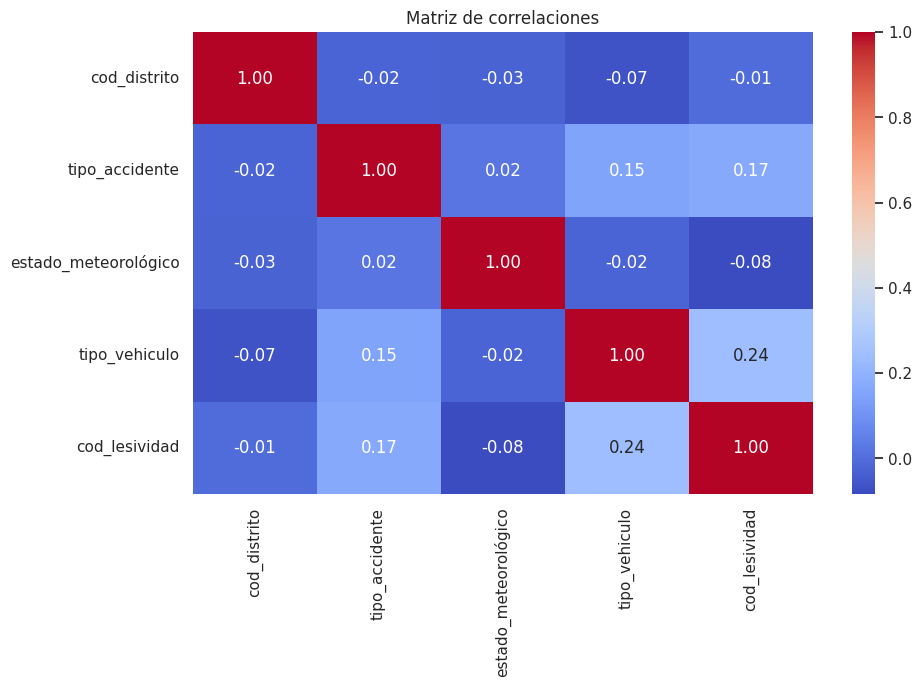

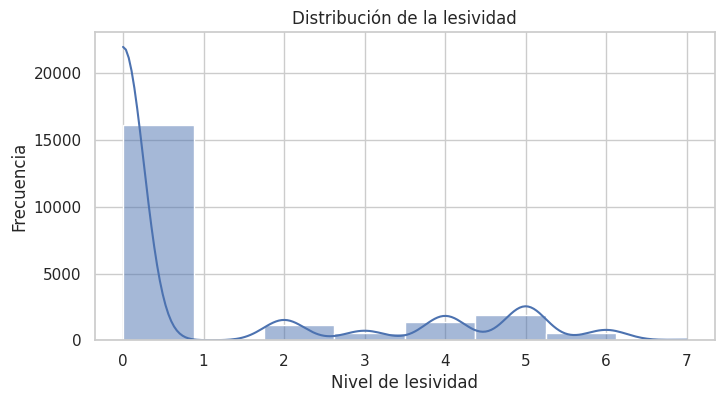

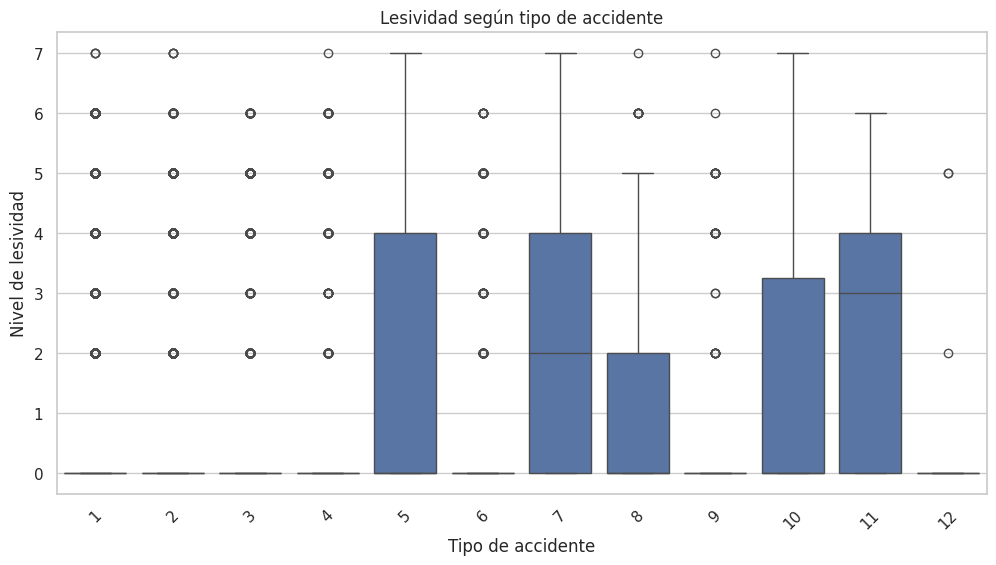

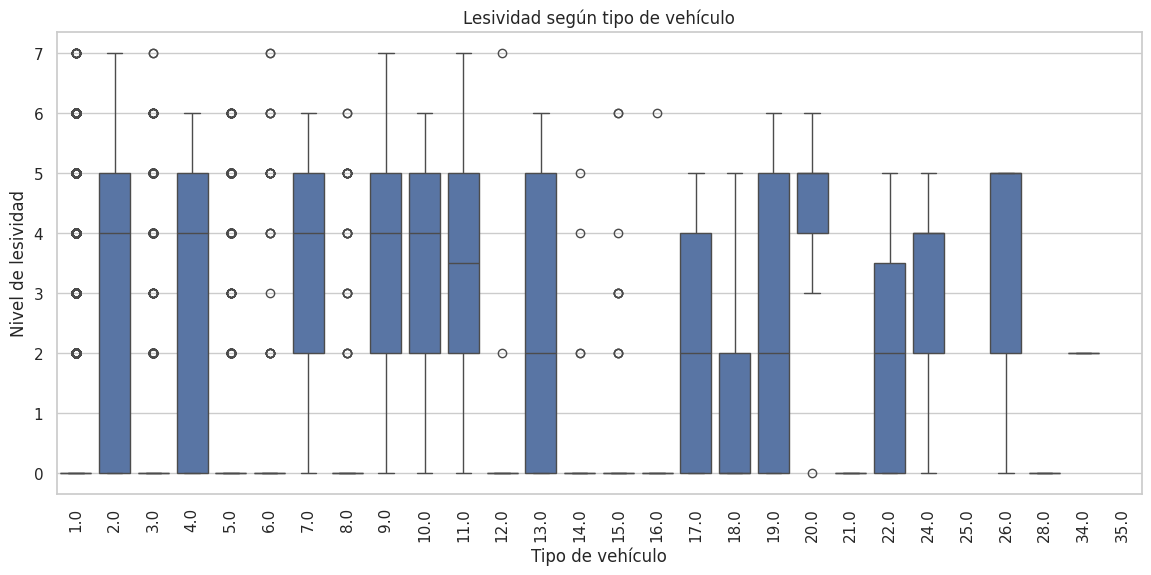

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# Mapear variables (según tu código original)
lesividad_mapping = {
    'Sin asistencia sanitaria': 0,
    'Asistencia sanitaria solo en el lugar del accidente': 1,
    'Asistencia sanitaria inmediata en centro de salud o mutua': 2,
    'Asistencia sanitaria ambulatoria con posterioridad': 3,
    'Atención en urgencias sin posterior ingreso': 4,
    'Ingreso inferior o igual a 24 horas': 5,
    'Ingreso superior a 24 horas': 6,
    'Fallecido 24 horas': 7
}
df['cod_lesividad'] = df['lesividad'].map(lesividad_mapping)

tipo_accidente_mapping = {
    'Colisión fronto-lateral': 1,
    'Alcance': 2,
    'Colisión lateral': 3,
    'Choque contra obstáculo fijo': 4,
    'Atropello a persona': 5,
    'Colisión múltiple': 6,
    'Caída': 7,
    'Colisión frontal': 8,
    'Otro': 9,
    'Solo salida de la vía': 10,
    'Vuelco': 11,
    'Atropello a animal': 12,
    'Despeñamiento': 13
}
df['tipo_accidente'] = df['tipo_accidente'].map(tipo_accidente_mapping)

estado_meteorologico_mapping = {
    'Despejado': 1,
    'Nublado': 2,
    'Lluvia débil': 3,
    'LLuvia intensa': 4,
    'Se desconoce': 5,
    'Granizando': 6,
    'Nevando': 7
}
df['estado_meteorológico'] = df['estado_meteorológico'].map(estado_meteorologico_mapping)

tipo_vehiculo_mapping = {
    'Turismo': 1,
    'Motocicleta hasta 125cc': 2,
    'Furgoneta': 3,
    'Motocicleta > 125cc': 4,
    'Autobús': 5,
    'Camión rígido': 6,
    'VMU eléctrico': 7,
    'Todo terreno': 8,
    'Bicicleta': 9,
    'Ciclomotor': 10,
    'Bicicleta EPAC (pedaleo asistido)': 11,
    'Tractocamión': 12,
    'Otros vehículos con motor': 13,
    'Maquinaria de obras': 14,
    'Autobús articulado': 15,
    'Vehículo articulado': 16,
    'Sin especificar': 17,
    'Cuadriciclo ligero': 18,
    'Autobus EMT': 19,
    'Ciclo': 20,
    'Autocaravana': 21,
    'Cuadriciclo no ligero': 22,
    'Tren/metro': 23,
    'Otros vehículos sin motor': 24,
    'Moto de tres ruedas > 125cc': 25,
    'Patinete no eléctrico': 26,
    'Ambulancia SAMUR': 27,
    'Remolque': 28,
    'Semiremolque': 29,
    'Ciclomotor de dos ruedas L1e-B': 30,
    'Moto de tres ruedas hasta 125cc': 31,
    'Camión de bomberos': 32,
    'Autobús articulado EMT': 33,
    'Ciclo de motor L1e-A': 34,
    'Ciclomotor de tres ruedas': 35,
    'Microbús <= 17 plazas': 36
}
df['tipo_vehiculo'] = df['tipo_vehiculo'].map(tipo_vehiculo_mapping)

# --- ESTUDIO ESTADÍSTICO ---

# 1. Resumen estadístico extendido
numeric_cols = df.select_dtypes(include='number').columns
summary_stats = pd.DataFrame(index=numeric_cols)
summary_stats['media'] = df[numeric_cols].mean()
summary_stats['mediana'] = df[numeric_cols].median()
summary_stats['moda'] = df[numeric_cols].mode().iloc[0]
summary_stats['desviación_std'] = df[numeric_cols].std()
summary_stats['mínimo'] = df[numeric_cols].min()
summary_stats['máximo'] = df[numeric_cols].max()
summary_stats['iqr'] = df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25)

print("Resumen estadístico extendido:\n", summary_stats)

# 2. Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

# 3. Visualización de lesividad

# Histograma
plt.figure(figsize=(8, 4))
sns.histplot(df['cod_lesividad'], bins=8, kde=True)
plt.title("Distribución de la lesividad")
plt.xlabel("Nivel de lesividad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: lesividad según tipo de accidente
plt.figure(figsize=(12, 6))
sns.boxplot(x="tipo_accidente", y="cod_lesividad", data=df)
plt.title("Lesividad según tipo de accidente")
plt.xlabel("Tipo de accidente")
plt.ylabel("Nivel de lesividad")
plt.xticks(rotation=45)
plt.show()

# Boxplot: lesividad según tipo de vehículo
plt.figure(figsize=(14, 6))
sns.boxplot(x="tipo_vehiculo", y="cod_lesividad", data=df)
plt.title("Lesividad según tipo de vehículo")
plt.xlabel("Tipo de vehículo")
plt.ylabel("Nivel de lesividad")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# ------------------- 1.1 Codificación ordinal de lesividad -------------------

lesividad_ordinal = {
    "Sin asistencia sanitaria": 0,
    "Asistencia sanitaria sólo en el lugar del accidente": 1,
    "Asistencia sanitaria inmediata en centro de salud o mutua": 2,
    "Asistencia sanitaria ambulatoria con posterioridad": 3,
    "Atención en urgencias sin posterior ingreso": 4,
    "Ingreso inferior o igual a 24 horas": 5,
    "Ingreso superior a 24 horas": 6,
    "Fallecido 24 horas": 7
}

df["lesividad"] = df["lesividad"].map(lesividad_ordinal)

# ------------------- 1.2 Codificación ordinal de rango de edad -------------------

rango_edad_ordinal = {
    "De 10 a 14 años": 0, "De 15 a 17 años": 1, "De 18 a 20 años": 2, "De 21 a 24 años": 3,
    "De 25 a 29 años": 4, "De 30 a 34 años": 5, "De 35 a 39 años": 6, "De 40 a 44 años": 7,
    "De 45 a 49 años": 8, "De 50 a 54 años": 9, "De 55 a 59 años": 10, "De 6 a 9 años": 11,
    "De 60 a 64 años": 12, "De 65 a 69 años": 13, "De 70 a 74 años": 14, "Desconocido": 15,
    "Menor de 5 años": 16, "Más de 74 años": 17
}

df["rango_edad"] = df["rango_edad"].map(rango_edad_ordinal)

# ------------------- 1.3 Calcular la media, mediana, desviación típica y moda -------------------

# Media
media_lesividad = df["lesividad"].mean()
media_rango_edad = df["rango_edad"].mean()

# Mediana
mediana_lesividad = df["lesividad"].median()
mediana_rango_edad = df["rango_edad"].median()

# Desviación típica
desviacion_lesividad = df["lesividad"].std()
desviacion_rango_edad = df["rango_edad"].std()

# Moda
moda_lesividad = df["lesividad"].mode()[0]  # mode() devuelve una Serie, por eso tomamos el primer valor
moda_rango_edad = df["rango_edad"].mode()[0]

# ------------------- 1.4 Mostrar los resultados -------------------

print(f"Media de Lesividad: {media_lesividad}")
print(f"Mediana de Lesividad: {mediana_lesividad}")
print(f"Desviación Típica de Lesividad: {desviacion_lesividad}")
print(f"Moda de Lesividad: {moda_lesividad}")

print(f"Media de Rango de Edad: {media_rango_edad}")
print(f"Mediana de Rango de Edad: {mediana_rango_edad}")
print(f"Desviación Típica de Rango de Edad: {desviacion_rango_edad}")
print(f"Moda de Rango de Edad: {moda_rango_edad}

SyntaxError: unterminated string literal (detected at line 62) (<ipython-input-27-9b0a77f41a6a>, line 62)

Gráficos descriptivos

In [ ]:
import pandas as pd

# Cargar archivo
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# Mapas de codificación
lesividad_ordinal = {
    "Sin asistencia sanitaria": 0,
    "Asistencia sanitaria sólo en el lugar del accidente": 1,
    "Asistencia sanitaria inmediata en centro de salud o mutua": 2,
    "Asistencia sanitaria ambulatoria con posterioridad": 3,
    "Atención en urgencias sin posterior ingreso": 4,
    "Ingreso inferior o igual a 24 horas": 5,
    "Ingreso superior a 24 horas": 6,
    "Fallecido 24 horas": 7
}

tipo_accidente_ordinal = {
    "Alcance": 0, "Atropello a animal": 1, "Atropello a persona": 2, "Caída": 3,
    "Choque contra obstáculo fijo": 4, "Colisión frontal": 5, "Colisión fronto-lateral": 6,
    "Colisión lateral": 7, "Colisión múltiple": 8, "Otro": 9,
    "Solo salida de la vía": 10, "Vuelco": 11
}

tipo_vehiculo_ordinal = {
    'Autobus EMT': 0, 'Autobús': 1, 'Autobús articulado': 2, 'Autocaravana': 3,
    'Bicicleta': 4, 'Bicicleta EPAC (pedaleo asistido)': 5, 'Camión rígido': 6,
    'Ciclo': 7, 'Ciclo de motor L1e-A': 8, 'Ciclomotor': 9, 'Ciclomotor de tres ruedas': 10,
    'Cuadriciclo ligero': 11, 'Cuadriciclo no ligero': 12, 'Furgoneta': 13,
    'Maquinaria de obras': 14, 'Moto de tres ruedas > 125cc': 15, 'Motocicleta > 125cc': 16,
    'Motocicleta hasta 125cc': 17, 'Otros vehículos con motor': 18, 'Otros vehículos sin motor': 19,
    'Patinete no eléctrico': 20, 'Remolque': 21, 'Sin especificar': 22, 'Todo terreno': 23,
    'Tractocamión': 24, 'Turismo': 25, 'VMU eléctrico': 26, 'Vehículo articulado': 27,
    'se desconoce': 28
}

estado_meteo_ordinal = {
    "Despejado": 0, "Granizando": 1, "LLuvia intensa": 2, "Lluvia débil": 3,
    "Nevando": 4, "Nublado": 5, "Se desconoce": 6
}

tipo_persona_ordinal = {"Conductor": 0, "Pasajero": 1, "Peatón": 2}

rango_edad_ordinal = {
    "De 10 a 14 años": 0, "De 15 a 17 años": 1, "De 18 a 20 años": 2, "De 21 a 24 años": 3,
    "De 25 a 29 años": 4, "De 30 a 34 años": 5, "De 35 a 39 años": 6, "De 40 a 44 años": 7,
    "De 45 a 49 años": 8, "De 50 a 54 años": 9, "De 55 a 59 años": 10, "De 6 a 9 años": 11,
    "De 60 a 64 años": 12, "De 65 a 69 años": 13, "De 70 a 74 años": 14, "Desconocido": 15,
    "Menor de 5 años": 16, "Más de 74 años": 17
}

alcohol_ordinal = {"N": 0, "S": 1}

# Aplicar codificaciones
df["lesividad"] = df["lesividad"].map(lesividad_ordinal)
df["tipo_accidente"] = df["tipo_accidente"].map(tipo_accidente_ordinal)
df["tipo_vehiculo"] = df["tipo_vehiculo"].map(tipo_vehiculo_ordinal)
df["estado_meteorológico"] = df["estado_meteorológico"].map(estado_meteo_ordinal)
df["tipo_persona"] = df["tipo_persona"].map(tipo_persona_ordinal)
df["rango_edad"] = df["rango_edad"].map(rango_edad_ordinal)
df["positiva_alcohol"] = df["positiva_alcohol"].map(alcohol_ordinal)

# Eliminar columnas no necesarias
df = df.drop(columns=["localizacion", "cod_distrito", "cod_lesividad", "distrito"])


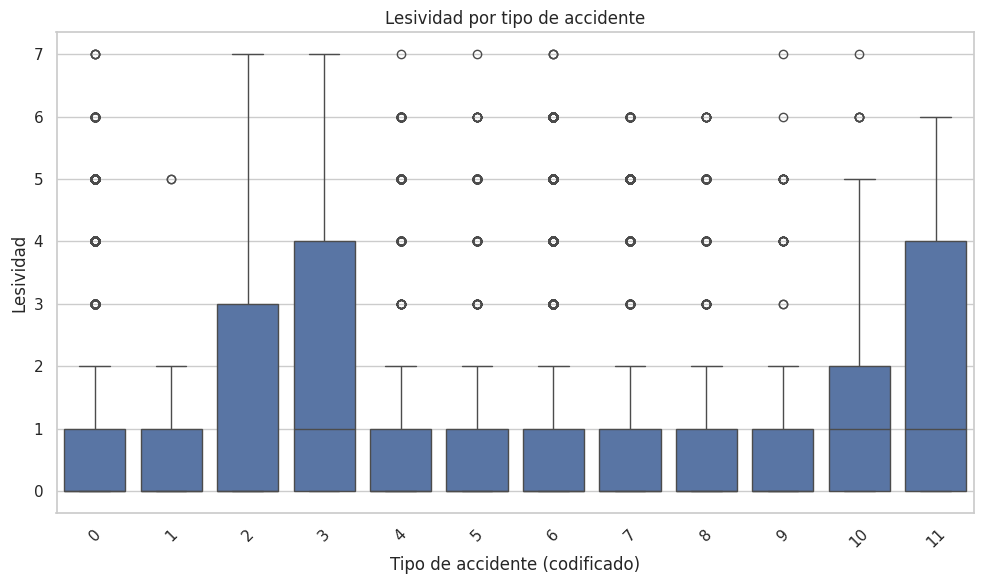

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="tipo_accidente", y="lesividad", data=df)
plt.title("Lesividad por tipo de accidente")
plt.xlabel("Tipo de accidente (codificado)")
plt.ylabel("Lesividad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df["tipo_accidente"] = df["tipo_accidente"].astype("category")


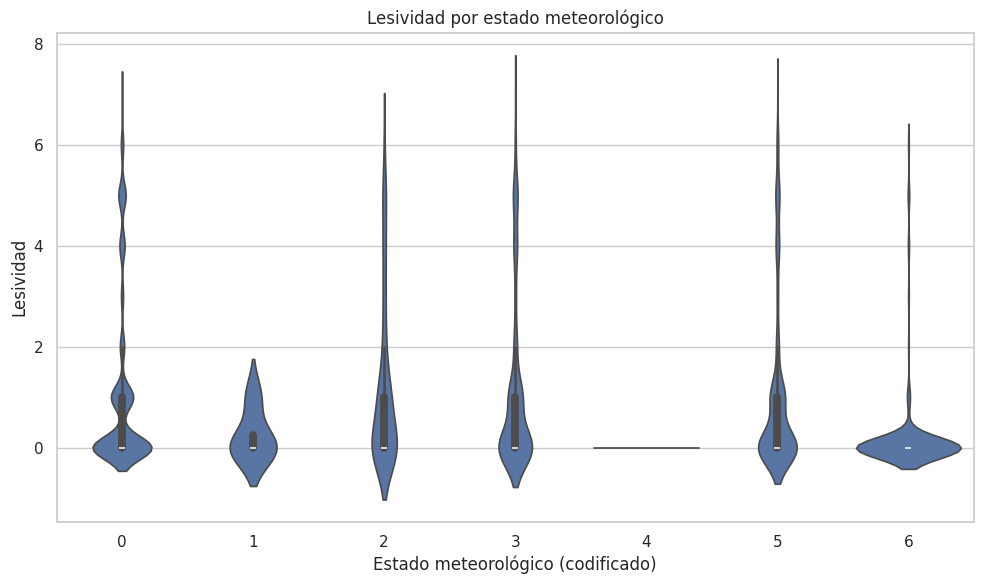

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="estado_meteorológico", y="lesividad", data=df)
plt.title("Lesividad por estado meteorológico")
plt.xlabel("Estado meteorológico (codificado)")
plt.ylabel("Lesividad")
plt.tight_layout()
plt.show()


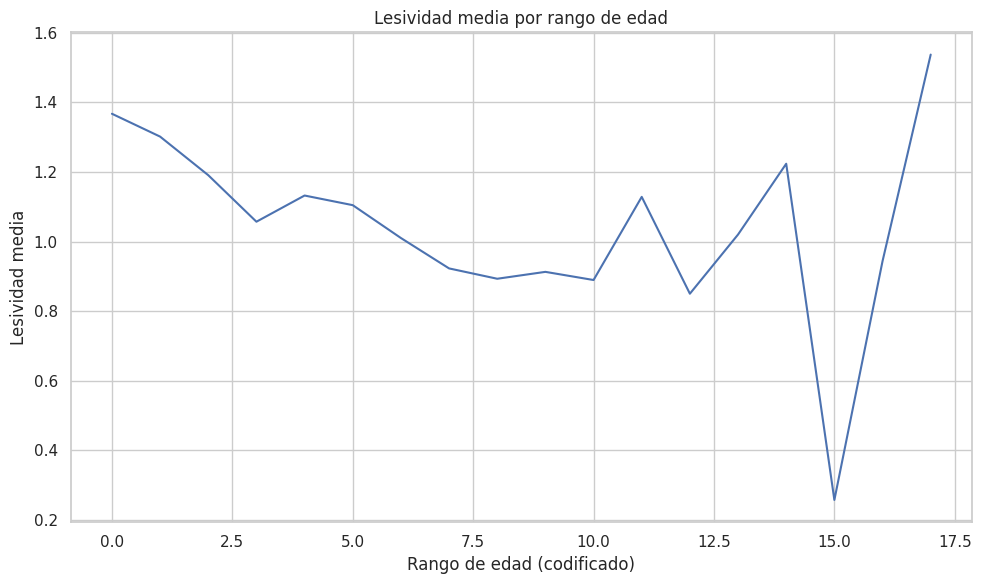

In [ ]:
plt.figure(figsize=(10, 6))
lesividad_por_edad = df.groupby("rango_edad")["lesividad"].mean().reset_index()
sns.lineplot(data=lesividad_por_edad, x="rango_edad", y="lesividad")
plt.title("Lesividad media por rango de edad")
plt.xlabel("Rango de edad (codificado)")
plt.ylabel("Lesividad media")
plt.tight_layout()
plt.show()


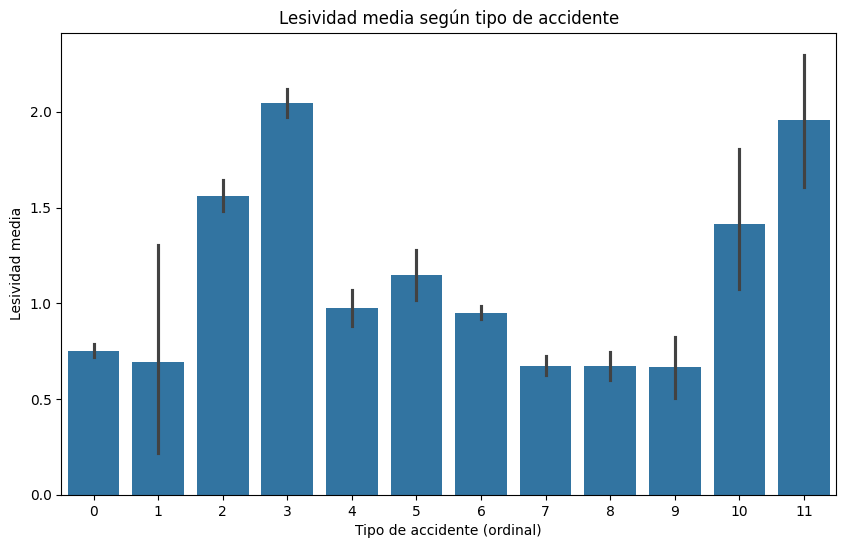

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="tipo_accidente", y="lesividad", estimator="mean")
plt.title("Lesividad media según tipo de accidente")
plt.xlabel("Tipo de accidente (ordinal)")
plt.ylabel("Lesividad media")
plt.show()


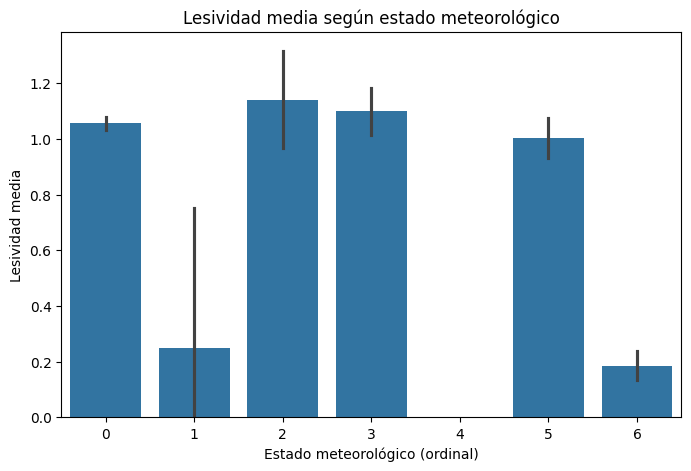

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="estado_meteorológico", y="lesividad", estimator="mean")
plt.title("Lesividad media según estado meteorológico")
plt.xlabel("Estado meteorológico (ordinal)")
plt.ylabel("Lesividad media")
plt.show()


<ipython-input-36-9ac6e8d54d6d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["rango_edad"] = pd.Categorical(df_filtrado["rango_edad"], categories=orden_rangos, ordered=True)


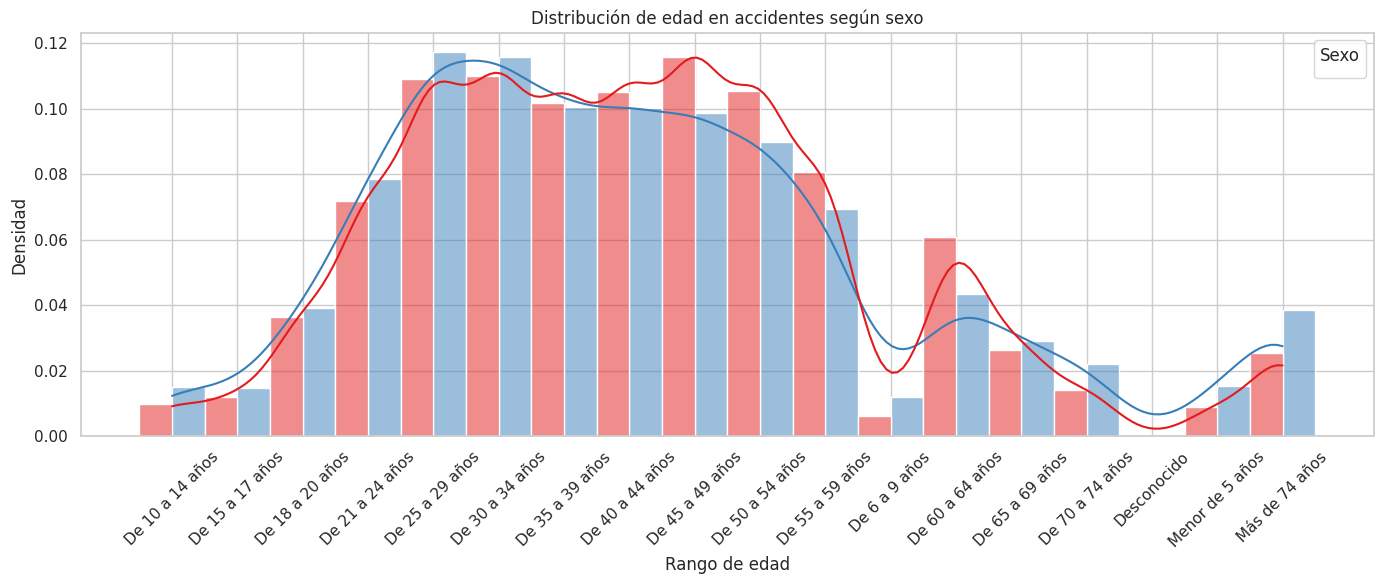

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Codificación si aún no está aplicada
rango_edad_ordinal = {
    "De 10 a 14 años": 0, "De 15 a 17 años": 1, "De 18 a 20 años": 2, "De 21 a 24 años": 3,
    "De 25 a 29 años": 4, "De 30 a 34 años": 5, "De 35 a 39 años": 6, "De 40 a 44 años": 7,
    "De 45 a 49 años": 8, "De 50 a 54 años": 9, "De 55 a 59 años": 10, "De 6 a 9 años": 11,
    "De 60 a 64 años": 12, "De 65 a 69 años": 13, "De 70 a 74 años": 14, "Desconocido": 15,
    "Menor de 5 años": 16, "Más de 74 años": 17
}
df["edad_ordinal"] = df["rango_edad"].map(rango_edad_ordinal)

# Filtrar y ordenar categorías
df_filtrado = df[df["rango_edad"] != "Desconocido"]
orden_rangos = sorted(rango_edad_ordinal, key=rango_edad_ordinal.get)
df_filtrado["rango_edad"] = pd.Categorical(df_filtrado["rango_edad"], categories=orden_rangos, ordered=True)

# Gráfico con leyenda clara
plt.figure(figsize=(14, 6))
ax = sns.histplot(
    data=df_filtrado,
    x="rango_edad",
    hue="sexo",
    kde=True,
    multiple="dodge",
    palette="Set1",
    stat="density",
    common_norm=False
)

# Ajustar título y ejes
plt.title("Distribución de edad en accidentes según sexo")
plt.xlabel("Rango de edad")
plt.ylabel("Densidad")
plt.xticks(rotation=45)

# Personalizar leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Hombre", "Mujer"], title="Sexo", loc="upper right")

plt.tight_layout()
plt.show()


<ipython-input-38-aedfd9542be4>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_accidentes_top5, x="tipo_accidente", y="lesividad", palette="Set1")


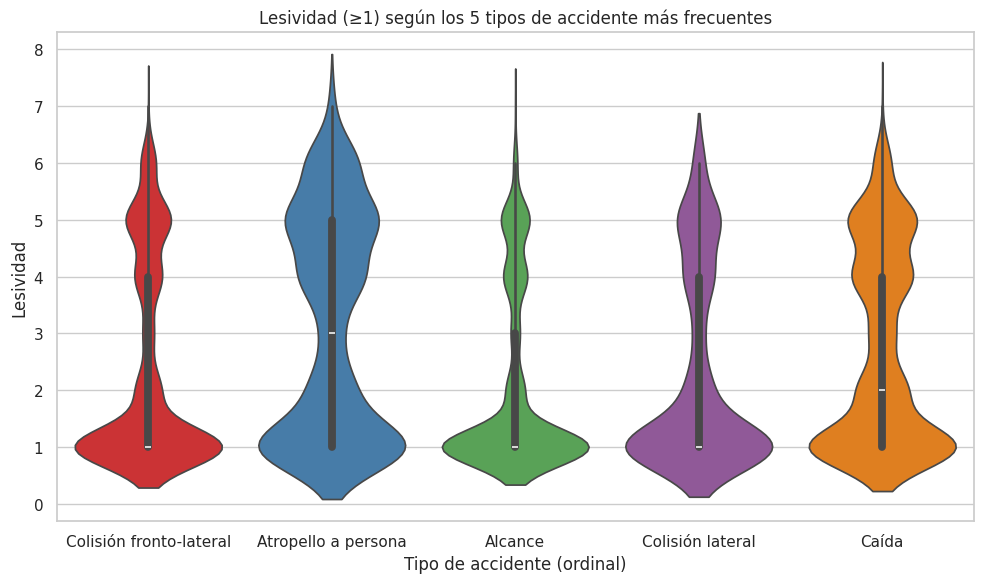

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# Aplicar codificación de lesividad
lesividad_ordinal = {
    "Sin asistencia sanitaria": 0,
    "Asistencia sanitaria sólo en el lugar del accidente": 1,
    "Asistencia sanitaria inmediata en centro de salud o mutua": 2,
    "Asistencia sanitaria ambulatoria con posterioridad": 3,
    "Atención en urgencias sin posterior ingreso": 4,
    "Ingreso inferior o igual a 24 horas": 5,
    "Ingreso superior a 24 horas": 6,
    "Fallecido 24 horas": 7
}
df["lesividad"] = df["lesividad"].map(lesividad_ordinal)

# Filtrar registros con lesividad >= 1
df_lesividad_alta = df[df["lesividad"] >= 1]

# Obtener los 5 tipos de accidente más frecuentes
top5_accidentes = df_lesividad_alta["tipo_accidente"].value_counts().nlargest(5).index

# Filtrar el DataFrame para los top 5
df_accidentes_top5 = df_lesividad_alta[df_lesividad_alta["tipo_accidente"].isin(top5_accidentes)]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.violinplot(data=df_accidentes_top5, x="tipo_accidente", y="lesividad", palette="Set1")

# Personalización del gráfico
plt.title("Lesividad (≥1) según los 5 tipos de accidente más frecuentes")
plt.xlabel("Tipo de accidente (ordinal)")
plt.ylabel("Lesividad")
plt.tight_layout()
plt.show()



<ipython-input-40-9a55539c4e99>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["estado_label"] = df_filtrado["estado_meteorológico"].map(inv_estado)
<ipython-input-40-9a55539c4e99>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["estado_label"] = pd.Categorical(df_filtrado["estado_label"], categories=orden, ordered=True)
<ipython-input-40-9a55539c4e99>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

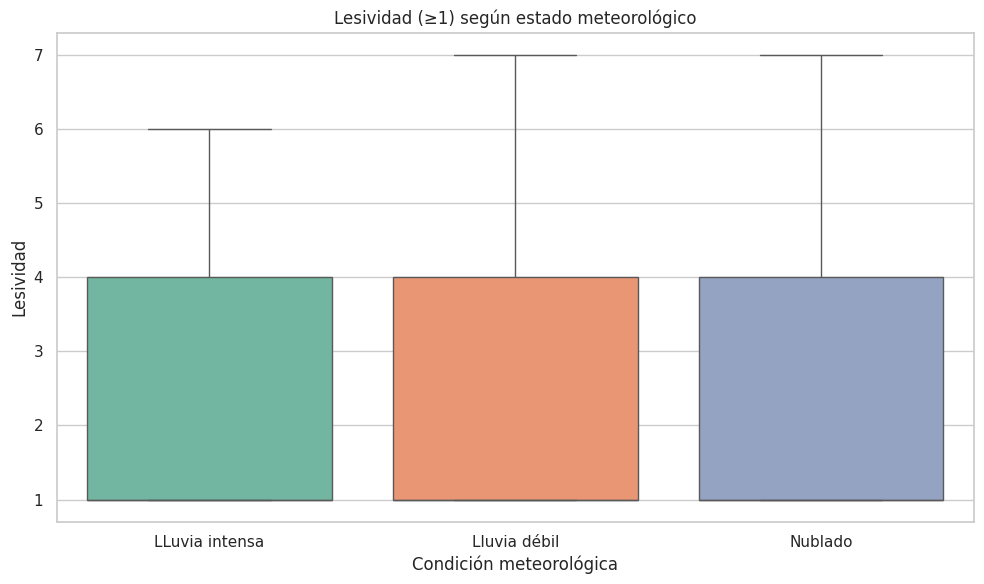

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# 2. Mapear codificaciones
lesividad_ordinal = {
    "Sin asistencia sanitaria": 0,
    "Asistencia sanitaria sólo en el lugar del accidente": 1,
    "Asistencia sanitaria inmediata en centro de salud o mutua": 2,
    "Asistencia sanitaria ambulatoria con posterioridad": 3,
    "Atención en urgencias sin posterior ingreso": 4,
    "Ingreso inferior o igual a 24 horas": 5,
    "Ingreso superior a 24 horas": 6,
    "Fallecido 24 horas": 7
}
estado_meteo_ordinal = {
    "Despejado": 0,
    "Granizando": 1,
    "LLuvia intensa": 2,
    "Lluvia débil": 3,
    "Nevando": 4,
    "Nublado": 5,
    "Se desconoce": 6
}

df["lesividad"] = df["lesividad"].map(lesividad_ordinal)
df["estado_meteorológico"] = df["estado_meteorológico"].map(estado_meteo_ordinal)

# 3. Filtrar registros: lesividad >=1 y solo los estados 2,3,5
estados = [2, 3, 5]  # LLuvia intensa, Lluvia débil, Nublado
df_filtrado = df[(df["lesividad"] >= 1) & (df["estado_meteorológico"].isin(estados))]

# 4. Volver a etiquetas legibles y ordenar
inv_estado = {v: k for k, v in estado_meteo_ordinal.items()}
df_filtrado["estado_label"] = df_filtrado["estado_meteorológico"].map(inv_estado)
orden = ["LLuvia intensa", "Lluvia débil", "Nublado"]
df_filtrado["estado_label"] = pd.Categorical(df_filtrado["estado_label"], categories=orden, ordered=True)

# 5. Dibujar boxplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df_filtrado, x="estado_label", y="lesividad", palette="Set2")

plt.title("Lesividad (≥1) según estado meteorológico")
plt.xlabel("Condición meteorológica")
plt.ylabel("Lesividad")
plt.tight_layout()
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

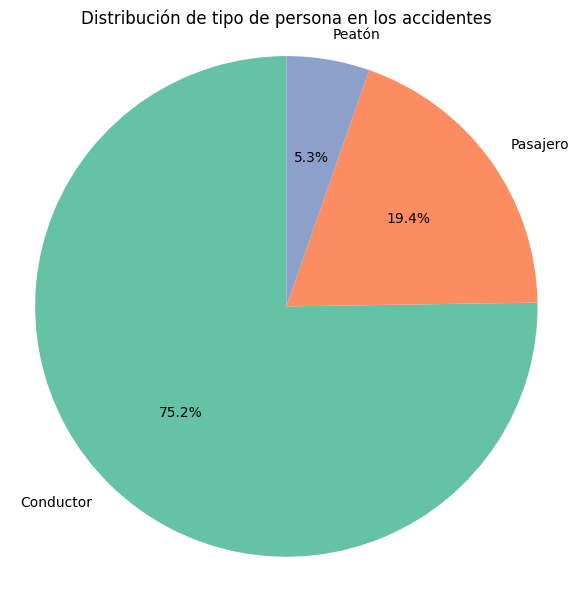

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel("DATASET_MODIFICADO_SIN_FECHA_HORA.xlsx")

# Contar ocurrencias de tipo de persona (categórica)
conteo_personas = df['tipo_persona'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(conteo_personas, labels=conteo_personas.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Distribución de tipo de persona en los accidentes")
plt.axis('equal')  # Para que el pastel sea circular
plt.tight_layout()
plt.show


Parte 6: Histograma - Distribución de Rango de Edad
